In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

Drop attributes that do not pertain to restuarants and rows that do not correspond to businesses that are restaurants

In [ ]:
pruned_file='yelp_academic_dataset_business_pruned.csv'
header=1

#Unnecessary attributes
prune=['attributes.HairSpecializesIn.coloring','attributes.HairSpecializesIn.straightperms','attributes.HairSpecializesIn.kids',
       'attributes.HairSpecializesIn.extensions','attributes.HairSpecializesIn.curly','attributes.HairSpecializesIn.africanamerican',
      'attributes.HairSpecializesIn.asian','attributes.HairSpecializesIn.perms','attributes.AcceptsInsurance','attributes.ByAppointmentOnly']

for chunk in pd.read_csv('/Users/malaika/Desktop/yelp_dataset/yelp_academic_dataset_business.csv',chunksize=1000):
    data=chunk.drop(prune,axis=1)
    check=d.categories
    selector=[]
    for i in range(len(check)):
        try:
            selector.append('Restaurant' in check[i])
        except:
            selector.append(False)
    data=data[selector]
    if(header):
        data.to_csv(pruned_file,mode='a')
        header=0
    else:
        data.to_csv(pruned_file,mode='a',header=False)


Exploratory Data Analysis on the pruned Business file

In [3]:
data=pd.read_csv('/Users/malaika/Desktop/yelp_dataset/yelp_academic_dataset_business_pruned.csv')

Convert boolean attributes to a numeric representation. We impute missing values of boolean attributes with 0.5

In [4]:
#print(data.isna().sum())
for i in data.columns.values:
    if(i.startswith('attributes')): #boolean attributes only
        data[i].replace([True,False],[1,0],inplace=True)
        index=pd.isnull(data[i])
        data[i][index]=0.5
data.describe()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,attributes.Ambience.touristy,attributes.RestaurantsCounterService,attributes.WheelchairAccessible,attributes.GoodForMeal.dessert,attributes.GoodForMeal.dinner,attributes.Ambience.casual,attributes.Ambience.divey,attributes.RestaurantsTakeOut,attributes.GoodForMeal.latenight,...,attributes.BikeParking,attributes.BestNights.tuesday,attributes.Music.video,attributes.DietaryRestrictions.vegetarian,attributes.RestaurantsTableService,attributes.Music.background_music,review_count,attributes.BusinessAcceptsCreditCards,attributes.BYOB,attributes.Ambience.hipster
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,307.000000,307.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,481.511401,0.141694,0.500000,0.640065,0.127036,0.355049,0.470684,0.286645,0.902280,0.130293,...,0.662866,0.475570,0.447883,0.5,0.530945,0.460912,56.739414,0.885993,0.493485,0.151466
std,297.835573,0.229281,0.057166,0.291364,0.252734,0.427027,0.424865,0.257408,0.252881,0.257491,...,0.380731,0.134878,0.153032,0.0,0.425710,0.156879,122.213372,0.255717,0.056793,0.243925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,219.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.500000,0.500000,0.500000,0.5,0.000000,0.500000,6.000000,1.000000,0.500000,0.000000
50%,476.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,1.000000,0.000000,...,1.000000,0.500000,0.500000,0.5,0.500000,0.500000,17.000000,1.000000,0.500000,0.000000
75%,738.000000,0.500000,0.500000,1.000000,0.000000,1.000000,1.000000,0.500000,1.000000,0.000000,...,1.000000,0.500000,0.500000,0.5,1.000000,0.500000,58.000000,1.000000,0.500000,0.500000
max,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.500000,0.5,1.000000,1.000000,1565.000000,1.000000,0.500000,1.000000


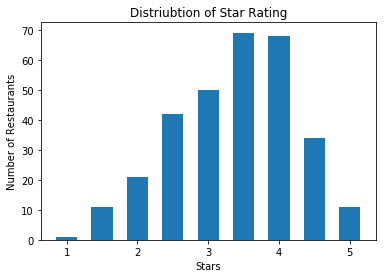

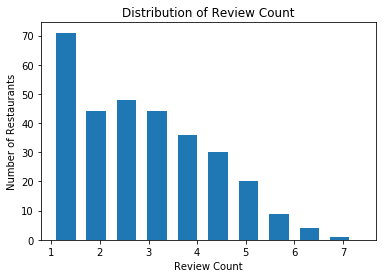

In [8]:
stars_x,stars_y=np.unique(data['stars'],return_counts=True)
plt.bar(stars_x,stars_y,width=0.3)
plt.title('Distriubtion of Star Rating')
plt.xlabel('Stars')
plt.ylabel('Number of Restaurants')
plt.show()
plt.hist(np.log(data['review_count']),width=0.4) # Apply a log transform to the data since it is highly skewed
plt.title('Distribution of Review Count')
plt.xlabel('Review Count')
plt.ylabel('Number of Restaurants')
plt.show()